In [1]:
import numpy as np
import matplotlib.pyplot as plt
import swiftest

In [2]:
swiftersim = swiftest.Simulation(param_file="param.swifter.in", codename="Swifter")
swiftersim.bin2xr()

Reading Swifter file param.swifter.in
Reading in time 1.000e+00
Creating Dataset
Successfully converted 1462 output frames.
Swifter simulation data stored as xarray DataSet .ds


In [3]:
swiftestsim = swiftest.Simulation(param_file="param.swiftest.in")
swiftestsim.bin2xr()

Reading Swiftest file param.swiftest.in

Creating Dataset from NetCDF file
Successfully converted 1462 output frames.
Swiftest simulation data stored as xarray DataSet .ds


In [4]:
swiftdiff = swiftestsim.ds - swiftersim.ds

In [5]:
swiftdiff.isel(time=0)['vhx']

<xarray.DataArray 'vhx' (id: 12)>
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Coordinates:
  * id       (id) int64 1 2 3 4 5 6 7 8 9 10 11 12
    time     float64 0.0

In [6]:
swiftdiff = swiftdiff.rename({'time' : 'time (y)'})

In [7]:
swiftdiff['dr'] = np.sqrt(swiftdiff['xhx']**2 + swiftdiff['xhy']**2 + swiftdiff['xhz']**2)
swiftdiff['dv'] = np.sqrt(swiftdiff['vhx']**2 + swiftdiff['vhy']**2 + swiftdiff['vhz']**2)

In [8]:
plidx = swiftdiff.id.values[swiftdiff.id.values < 9]
tpidx = swiftdiff.id.values[swiftdiff.id.values >= 9]

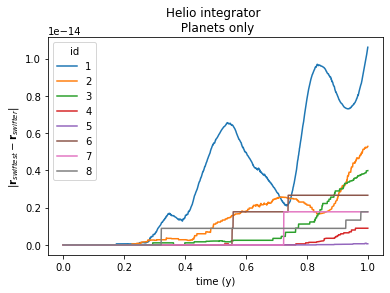

In [9]:
fig, ax = plt.subplots()
swiftdiff['dr'].sel(id=plidx).plot.line(x="time (y)", ax=ax)
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
ax.set_title("Helio integrator \n Planets only")
#legend = ax.legend()
fig.savefig("helio_swifter_comparison-pl-rmag.png", facecolor='white', transparent=False, dpi=300)

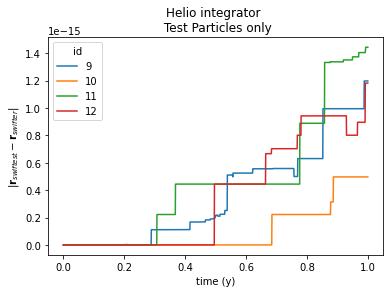

In [10]:
fig, ax = plt.subplots()
swiftdiff['dr'].sel(id=tpidx).plot.line(x="time (y)", ax=ax)
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
ax.set_title("Helio integrator \n Test Particles only")
fig.savefig("helio_swifter_comparison-tp-rmag.png", facecolor='white', transparent=False, dpi=300)

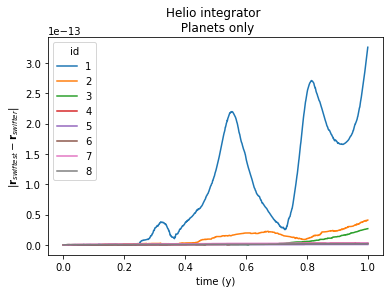

In [11]:
fig, ax = plt.subplots()
swiftdiff['dv'].sel(id=plidx).plot.line(x="time (y)", ax=ax)
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
ax.set_title("Helio integrator \n Planets only")
fig.savefig("helio_swifter_comparison-pl-vmag.png", facecolor='white', transparent=False, dpi=300)

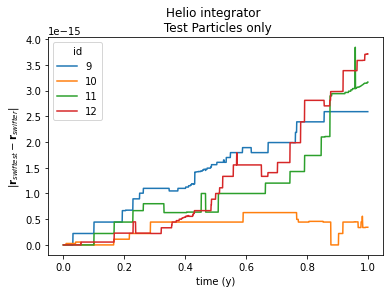

In [12]:
fig, ax = plt.subplots()
swiftdiff['dv'].sel(id=tpidx).plot.line(x="time (y)", ax=ax)
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
ax.set_title("Helio integrator \n Test Particles only")
fig.savefig("helio_swifter_comparison-tp-vmag.png", facecolor='white', transparent=False, dpi=300)